In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_excel("Strava Running Data.xlsx")
df=pd.DataFrame(data)
print(data.head())


   Sr. no.      start_date_local type  distance  moving_time  elapsed_time  \
0        1  2023-12-09T09:09:19Z  Run   10879.7         4023          4617   
1        2  2023-12-07T17:31:50Z  Run    1304.4          722         62993   
2        3  2023-12-03T09:18:13Z  Run   17503.0         7370          7462   
3        4  2023-12-02T09:41:14Z  Run    3457.8         1791          2170   
4        5  2023-12-01T17:06:05Z  Run   10108.2         4128          4221   

   total_elevation_gain                             start_latlng  \
0                  91.4  [40.70327935740352, -73.99619171395898]   
1                   0.0   [40.7220459356904, -74.03641730546951]   
2                  68.4  [40.74991073459387, -73.98751585744321]   
3                   3.9  [40.72203076444566, -74.03641068376601]   
4                   6.3  [40.72190687991679, -74.03624514117837]   

                                 end_latlng sport_type            start_date  \
0   [40.69340907968581, -73.97922154515982

In [8]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sr. no.               105 non-null    int64  
 1   start_date_local      105 non-null    object 
 2   type                  105 non-null    object 
 3   distance              105 non-null    float64
 4   moving_time           105 non-null    int64  
 5   elapsed_time          105 non-null    int64  
 6   total_elevation_gain  105 non-null    float64
 7   start_latlng          105 non-null    object 
 8   end_latlng            105 non-null    object 
 9   sport_type            105 non-null    object 
 10  start_date            105 non-null    object 
 11  timezone              105 non-null    object 
 12  achievement_count     105 non-null    int64  
 13  kudos_count           105 non-null    int64  
 14  comment_count         105 non-null    int64  
 15  athlete_count         1

In [10]:
print(data.isnull().sum())

Sr. no.                 0
start_date_local        0
type                    0
distance                0
moving_time             0
elapsed_time            0
total_elevation_gain    0
start_latlng            0
end_latlng              0
sport_type              0
start_date              0
timezone                0
achievement_count       0
kudos_count             0
comment_count           0
athlete_count           0
photo_count             0
average_speed           0
max_speed               0
dtype: int64


In [13]:
data=df.copy()

In [14]:
data['start_date_local'] = pd.to_datetime(data['start_date_local'], errors='coerce')
data['start_date'] = pd.to_datetime(data['start_date'], errors='coerce')


In [15]:
data['moving_time_min'] = data['moving_time'] / 60
data['elapsed_time_min'] = data['elapsed_time'] / 60

In [16]:
data['distance_km'] = data['distance'] / 1000


In [17]:
data['average_speed_kmh'] = data['average_speed'] * 3.6
data['max_speed_kmh'] = data['max_speed'] * 3.6

In [18]:
data['pace_min_per_km'] = data['moving_time_min'] / data['distance_km']


In [19]:
data['weekday'] = data['start_date_local'].dt.day_name()
data['hour'] = data['start_date_local'].dt.hour
data['month'] = data['start_date_local'].dt.month_name()

In [20]:
data = data.drop(columns=['Sr. no.', 'start_latlng', 'end_latlng'])

In [24]:
data.to_csv("Strava_Fitness_Cleaned.csv", index=False)

print("✅ Cleaned dataset saved as 'Strava_Fitness_Cleaned.csv'")
print("Shape:", data.shape)
data

✅ Cleaned dataset saved as 'Strava_Fitness_Cleaned.csv'
Shape: (105, 25)


,start_date_local,type,distance,moving_time,elapsed_time,total_elevation_gain,sport_type,start_date,timezone,achievement_count,...,max_speed,moving_time_min,elapsed_time_min,distance_km,average_speed_kmh,max_speed_kmh,pace_min_per_km,weekday,hour,month
0,2023-12-09 09:09:19+00:00,Run,10879.7,4023,4617,91.4,Run,2023-12-09 14:09:19+00:00,(GMT-05:00) America/New_York,4,...,6.228,67.050000,76.950000,10.8797,9.7344,22.4208,6.162854,Saturday,9,December
1,2023-12-07 17:31:50+00:00,Run,1304.4,722,62993,0.0,Run,2023-12-07 22:31:50+00:00,(GMT-05:00) America/New_York,0,...,4.044,12.033333,1049.883333,1.3044,6.5052,14.5584,9.225187,Thursday,17,December
2,2023-12-03 09:18:13+00:00,Run,17503.0,7370,7462,68.4,Run,2023-12-03 14:18:13+00:00,(GMT-05:00) America/New_York,2,...,6.778,122.833333,124.366667,17.5030,8.5500,24.4008,7.017845,Sunday,9,December
3,2023-12-02 09:41:14+00:00,Run,3457.8,1791,2170,3.9,Run,2023-12-02 14:41:14+00:00,(GMT-05:00) America/New_York,0,...,4.522,29.850000,36.166667,3.4578,6.9516,16.2792,8.632657,Saturday,9,December
4,2023-12-01 17:06:05+00:00,Run,10108.2,4128,4221,6.3,Run,2023-12-01 22:06:05+00:00,(GMT-05:00) America/New_York,4,...,5.462,68.800000,70.350000,10.1082,8.8164,19.6632,6.806355,Friday,17,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2022-06-12 09:20:44+00:00,Run,7857.2,3900,4113,116.6,Run,2022-06-12 13:20:44+00:00,(GMT-05:00) America/New_York,6,...,3.326,65.000000,68.550000,7.8572,7.2540,11.9736,8.272667,Sunday,9,June
101,2022-05-28 11:11:38+00:00,Run,6067.2,3334,3555,88.2,Run,2022-05-28 15:11:38+00:00,(GMT-05:00) America/New_York,3,...,3.172,55.566667,59.250000,6.0672,6.5520,11.4192,9.158536,Saturday,11,May
102,2022-05-22 07:13:30+00:00,Run,4587.6,2263,2478,56.6,Run,2022-05-22 11:13:30+00:00,(GMT-05:00) America/New_York,5,...,3.557,37.716667,41.300000,4.5876,7.2972,12.8052,8.221437,Sunday,7,May
103,2022-05-21 07:27:40+00:00,Run,4313.6,2182,2426,55.0,Run,2022-05-21 11:27:40+00:00,(GMT-05:00) America/New_York,4,...,3.874,36.366667,40.433333,4.3136,7.1172,13.9464,8.430700,Saturday,7,May


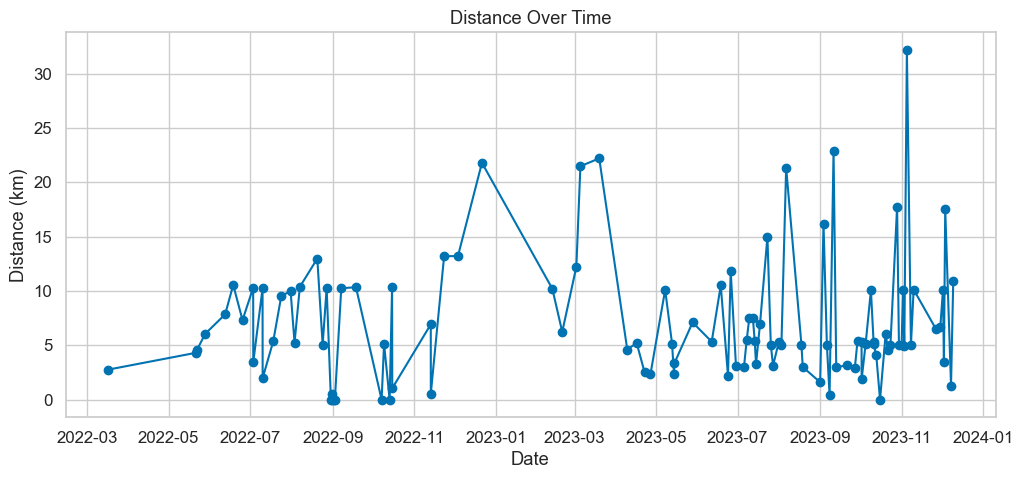

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='colorblind', font_scale=1.1)

# 📊 1. Distance over time
# -----------------------------
plt.figure(figsize=(12,5))
plt.plot(data['start_date_local'], data['distance_km'], marker='o')
plt.title("Distance Over Time")
plt.xlabel("Date")
plt.ylabel("Distance (km)")
plt.show()


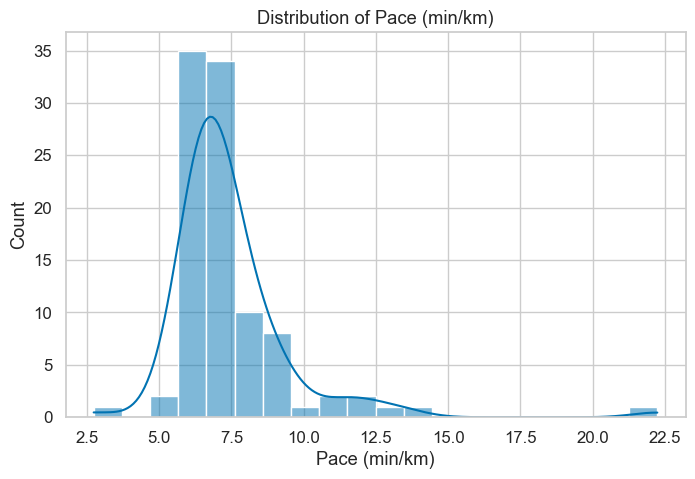

In [41]:
# -----------------------------
# 📊 2. Pace distribution
# -----------------------------
plt.figure(figsize=(8,5))
sns.histplot(data['pace_min_per_km'], bins=20, kde=True)
plt.title("Distribution of Pace (min/km)")
plt.xlabel("Pace (min/km)")
plt.show()


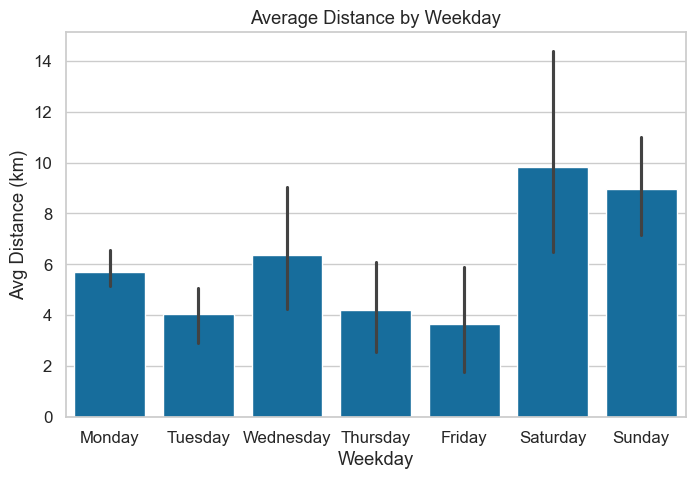

In [42]:
# 📊 3. Activity by weekday
# -----------------------------
plt.figure(figsize=(8,5))
sns.barplot(x="weekday", y="distance_km", data=data, estimator="mean", order=[
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Average Distance by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Avg Distance (km)")
plt.show()

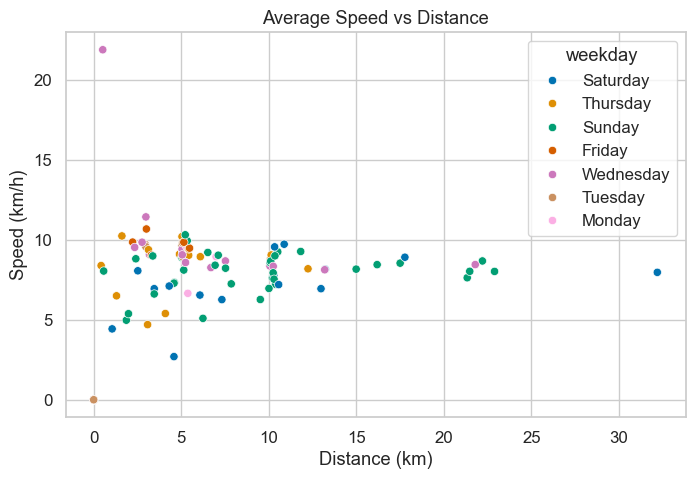

In [43]:
# 📊 4. Average speed vs distance
# -----------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(x="distance_km", y="average_speed_kmh", data=data, hue="weekday")
plt.title("Average Speed vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Speed (km/h)")
plt.show()

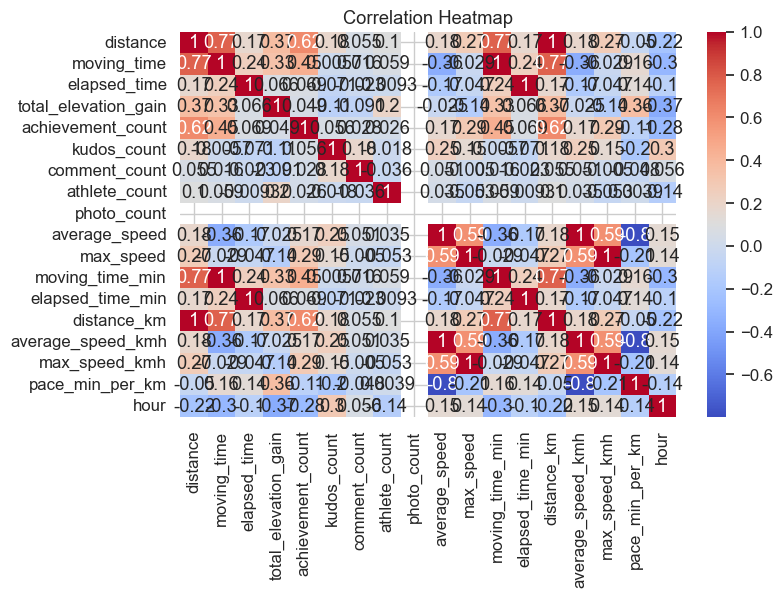

In [44]:
#📊 5. Correlation heatmap
# -----------------------------
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()